<a href="https://colab.research.google.com/github/PosgradoMNA/Actividades_Aprendizaje-A01794023-Andres_Palacios/blob/main/Data_Analysis_with_Python_(IBM)_Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis with Python (IBM): Module3**

**Asignatura: Ciencia y Analitica de datos**

**Nombre: Jaime Andres Palacios Campaña**

**Matricula: A01794023**

**Exploratory Data Analysis (EDA)**

- Summarize main characteristics of the data - gain better understanding of the dataset,
- Uncover relationships between different variables, and
- Extract important variables for the problem we are trying to solve.

## **Descriptive Statistics**

In [1]:
import pandas as pd #Importamos la libreria de Pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url, header=None)  #Creamos el dataframe con el csv de url, no tiene columnas titulos.

# creamos una lista con los headers manualmente para luego agregarlos al df
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers #agregamos a la lista 'headers' como headers.

In [2]:
df.describe() #Genera estadisticas basicas para las variables numericas

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [3]:
#These are variables that can be divided up into different categories,or groups and have discrete values

drive_wheels_counts= df["drive-wheels"].value_counts() #summarize the categorical data

drive_wheels_counts.rename(axis= {"drive-wheels":"value_counts"},inplace=True) #We change the name of the column to make it easier to read
drive_wheels_counts.index.name= "drive-wheels"

drive_wheels_counts

drive-wheels
fwd    120
rwd     76
4wd      9
dtype: int64

In [4]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
from contextlib import nullcontext
df = df.replace(['?'],[np.NaN])
df['price'] = df['price'].astype('float64')

df = df.dropna()

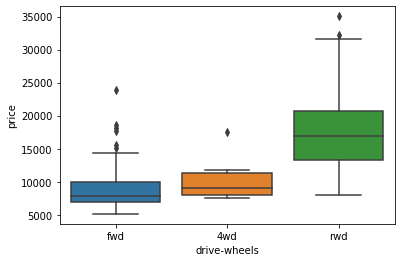

In [6]:
#boxplot
sns.boxplot(x="drive-wheels", y="price", data=df)

Text(0, 0.5, 'Price')

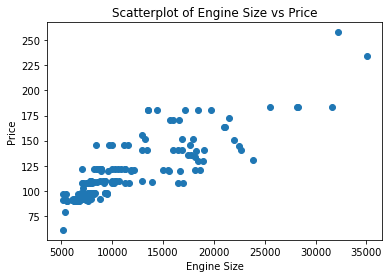

In [7]:
#Scatterplot

y=df['engine-size']
x=df['price']
plt.scatter(x,y)

plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

## GroupBy in Python

In [8]:
#first pick out the three data columns we are interested in
df_test = df[['drive-wheels','body-style','price']]

#then group the reduced data according to ‘drive-wheels’ and ‘body-style’
df_grp = df_test.groupby(['drive-wheels','body-style',], as_index=False).mean()

df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,hardtop,8249.000000
4,fwd,hatchback,7989.800000
5,fwd,sedan,9558.120000
6,fwd,wagon,8829.222222
7,rwd,convertible,26362.500000
8,rwd,hardtop,14365.750000
9,rwd,hatchback,14918.500000


In [9]:
#A table of this form isn’t the easiest to read, and also not very easy to visualize.
#To make it easier to understand, we can transform this table to a pivot table by using the pivot

df_pivot = df_grp.pivot(index= 'drive-wheels', columns='body-style')
df_pivot

price                                                
body-style   convertible   hardtop hatchback         sedan         wagon
drive-wheels                                                            
4wd                  NaN       NaN    7603.0  12647.333333   9095.750000
fwd                  NaN   8249.00    7989.8   9558.120000   8829.222222
rwd              26362.5  14365.75   14918.5  18318.576923  19282.000000

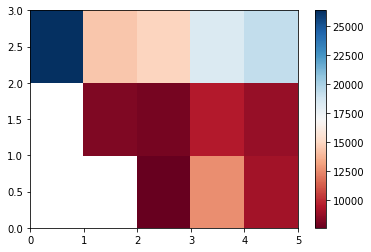

In [29]:
#heatmap
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

##Analysis of variance (ANOVA)

In [33]:
df_anova = df[['make','price']]

gruoped_anova = df_anova.groupby(['make'])

##Correlation

(0.0, 39243.47266797349)

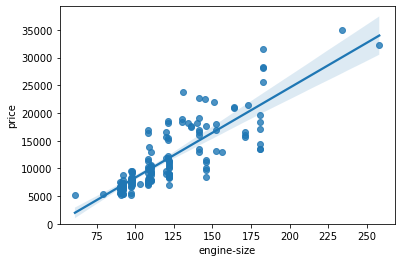

In [36]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

(0.0, 37178.636633875016)

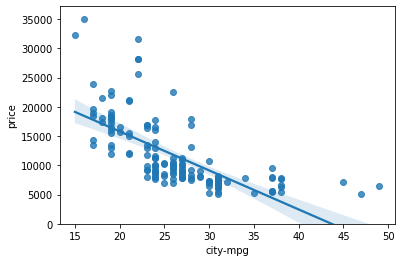

In [40]:
sns.regplot(x='city-mpg', y='price', data=df)
plt.ylim(0,)

# **LABS**

Question #1:
What is the data type of the column "peak-rpm"?

In [42]:
df['peak-rpm'].dtypes

dtype('float64')

Question #2: 
Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

Hint: if you would like to select those columns, use the following syntax: df[['bore','stroke','compression-ratio','horsepower']]

In [41]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio
bore,1.000000,-0.102581,0.015119
stroke,-0.102581,1.000000,0.243587
compression-ratio,0.015119,0.243587,1.000000


Question 3 a): 
Find the correlation between x="stroke" and y="price".

Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].

In [43]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.160664
price,0.160664,1.000000


Question 3 b):
Given the correlation results between "price" and "stroke", do you expect a linear relationship?

Verify your results using the function "regplot()".

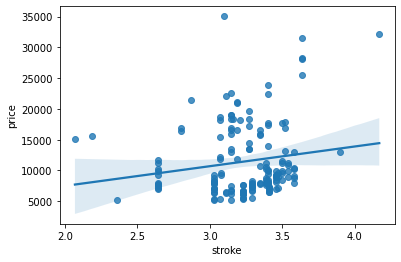

In [44]:
sns.regplot(x="stroke", y="price", data=df)